In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import re
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("vgsales.csv")
df

Title Original Price Discounted Price  \
0                         Baldur's Gate 3         $29.99           $29.99   
1        Counter-Strike: Global Offensive         $14.99           $14.99   
2                           Apex Legends™           Free             Free   
3                         Forza Horizon 5         $34.78           $17.39   
4                           Call of Duty®           Free             Free   
...                                   ...            ...              ...   
71695                           The Front           Free             Free   
71696                        The Bornless           Free             Free   
71697                     Winter Memories           Free             Free   
71698  Call of Duty®: Modern Warfare® III         $69.99           $69.99   
71699            Pixel Gun 3D: PC Edition           Free             Free   

          Release Date                                               Link  \
0          3 Aug, 2023  https://store.steampowered.com/app/1086940/Bal...   
1         21 Aug, 2012  https://store.steampowered.com/app/730/Counter...   
2          4 Nov, 2020  https://store.steampowered.com/app/1172470/Ape...   
3          8 Nov, 2021  https://store.steampowered.com/app/1551360/For...   
4         27 Oct, 2022  https://store.steampowered.com/app/1938090/Cal...   
...                ...                                                ...   
71695  To be announced  https://store.steampowered.com/app/2285150/The...   
71696  To be announced  https://store.steampowered.com/app/2411280/The...   
71697      Coming soon  https://store.steampowered.com/app/2495450/Win...   
71698      Coming soon  https://store.steampowered.com/app/2519060/Cal...   
71699  To be announced  https://store.steampowered.com/app/2524890/Pix...   

                                        Game Description  \
0      Baldur’s Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty® HQ, the home of Call ...   
...                                                  ...   
71695  The Front is a survival-open-world-crafting (S...   
71696  Welcome to The Bornless, an action horror FPS....   
71697  After the unforgettable summer memories you’ve...   
71698  In the direct sequel to the record-breaking Ca...   
71699  Pixel Gun 3D is a near complete PC port of a l...   

        Recent Reviews Summary All Reviews Summary  \
0      Overwhelmingly Positive       Very Positive   
1                Very Positive       Very Positive   
2                        Mixed       Very Positive   
3                Very Positive       Very Positive   
4                        Mixed               Mixed   
...                        ...                 ...   
71695                      NaN                 NaN   
71696                      NaN                 NaN   
71697                      NaN                 NaN   
71698                      NaN                 NaN   
71699                      NaN                 NaN   

                                   Recent Reviews Number  \
0      - 96% of the 128,900 user reviews in the last ...   
1      - 89% of the 75,284 user reviews in the last 3...   
2      - 65% of the 18,581 user reviews in the last 3...   
3      - 87% of the 4,120 user reviews in the last 30...   
4      - 49% of the 8,257 user reviews in the last 30...   
...                                                  ...   
71695                                                NaN   
71696                                                NaN   
71697                                                NaN   
71698                                                NaN   
71699                                                NaN   

                                      All Reviews Number  \
0      - 94% of the 188,617 user re

In [3]:
df.shape

(71700, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71699 non-null  object
 1   Original Price          71700 non-null  object
 2   Discounted Price        71700 non-null  object
 3   Release Date            71569 non-null  object
 4   Link                    71700 non-null  object
 5   Game Description        71489 non-null  object
 6   Recent Reviews Summary  56480 non-null  object
 7   All Reviews Summary     5371 non-null   object
 8   Recent Reviews Number   56480 non-null  object
 9   All Reviews Number      5371 non-null   object
 10  Developer               71479 non-null  object
 11  Publisher               71183 non-null  object
 12  Supported Languages     71700 non-null  object
 13  Popular Tags            71700 non-null  object
 14  Game Features           71700 non-null  object
 15  Mi

In [5]:
df.describe()

Title Original Price Discounted Price Release Date  \
count             71699          71700            71700        71569   
unique            71699            654              827         4441   
top     Baldur's Gate 3           Free             Free  Coming soon   
freq                  1          17585            17585         5887   

                                                     Link  \
count                                               71700   
unique                                              71700   
top     https://store.steampowered.com/app/1086940/Bal...   
freq                                                    1   

                                    Game Description Recent Reviews Summary  \
count                                          71489                  56480   
unique                                         71090                     18   
top     Find the objects that are hidden on the map.          Very Positive   
freq                                              34                  11039   

       All Reviews Summary                         Recent Reviews Number  \
count                 5371                                         56480   
unique                   7                                         13391   
top          Very Positive  - Need more user reviews to generate a score   
freq                  3151                                         18999   

                                       All Reviews Number        Developer  \
count                                                5371            71479   
unique                                               5296            45353   
top     - 90% of the 624 user reviews for this game ar...  Choice of Games   
freq                                                    3              162   

             Publisher Supported Languages         Popular Tags  \
count            71183               71700                71700   
unique           38543               11058                65817   
top     Big Fish Games         ['English']  ['Indie', 'Casual']   
freq               459               38083                  284   

            Game Features                               Minimum Requirements  
count               71700                                              70576  
unique               5418                                              63201  
top     ['Single-player']  Requires a 64-bit processor and operating syst...  
freq                17262                                                274

In [6]:
def get_fig_and_ax():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()

    return fig, ax

Text(0, 0.5, 'Occurence')

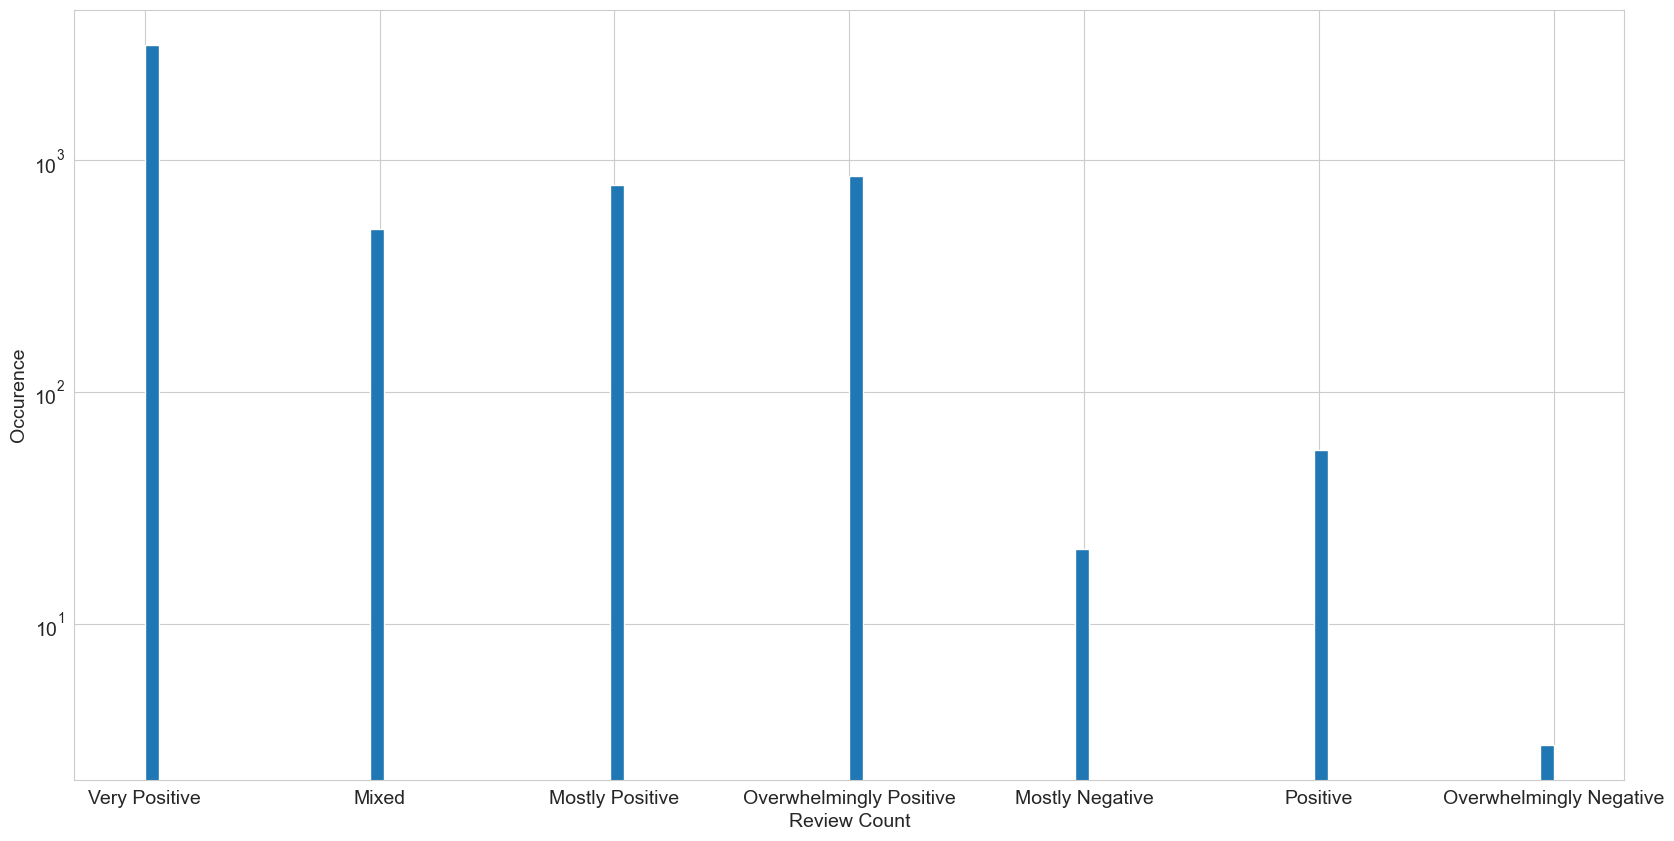

In [7]:
# Составить гистограмму счетчиков отзывов
sns.set_style("whitegrid")
fig, ax = get_fig_and_ax()
df["All Reviews Summary"].hist(ax=ax, bins=100)
ax.set_yscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("Review Count", fontsize=14)
ax.set_ylabel("Occurence", fontsize=14)

### 1: Квантование величин на ячейки фиксированной величины

In [8]:
# Преобразование цены, указанной в str (например $20.31) в int - 2031, результирующая цена представляет собой центы
df["Original Price"] = (
    df["Original Price"]
    .str.replace("$", "")
    .str.replace(",", "")
    .str.replace("Free", "0")
    .astype(float)
    .apply(lambda x: x * 100)
    .astype(int)
)

In [9]:
small_counts = df["Original Price"]
small_counts

0        2999
1        1499
2           0
3        3478
4           0
         ... 
71695       0
71696       0
71697       0
71698    6998
71699       0
Name: Original Price, Length: 71700, dtype: int64

In [10]:
# Помещаем в ячейки равной ширины методом деления
np.floor_divide(small_counts, 5)

0         599
1         299
2           0
3         695
4           0
         ... 
71695       0
71696       0
71697       0
71698    1399
71699       0
Name: Original Price, Length: 71700, dtype: int64

### 2. Разделение на ячейки экспоненциальной ширины

In [11]:
# Парсинг строки All Reviews Number
df = df.dropna(subset=["All Reviews Number"])

for idx, row in tqdm(df.iterrows()):
    review_number = row["All Reviews Number"]
    if review_number is np.nan:
        continue

    found = re.search(r"- \d{1,2}% of the ([0-9,]+) user reviews for this game are positive\.", review_number)
    if found is None:
        continue

    found = int(found[1].replace(",", ""))
    df.loc[idx, "Reviews Count"] = found
df

0it [00:00, ?it/s]

/var/folders/1l/sljqjzq579vfs5tgztmg_x_w0000gn/T/ipykernel_36749/3434395955.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[idx, "Reviews Count"] = found


Title  Original Price Discounted Price  \
0                        Baldur's Gate 3            2999           $29.99   
1       Counter-Strike: Global Offensive            1499           $14.99   
2                          Apex Legends™               0             Free   
3                        Forza Horizon 5            3478           $17.39   
4                          Call of Duty®               0             Free   
...                                  ...             ...              ...   
37971            Call of Duty®: Warzone™               0             Free   
37973                         Their Land               0             Free   
49113  Call of Duty®: Modern Warfare® II            6998           $69.99   
69227                            SteamVR               0             Free   
70970      Resident Evil 4 Chainsaw Demo               0             Free   

       Release Date                                               Link  \
0       3 Aug, 2023  https://store.steampowered.com/app/1086940/Bal...   
1      21 Aug, 2012  https://store.steampowered.com/app/730/Counter...   
2       4 Nov, 2020  https://store.steampowered.com/app/1172470/Ape...   
3       8 Nov, 2021  https://store.steampowered.com/app/1551360/For...   
4      27 Oct, 2022  https://store.steampowered.com/app/1938090/Cal...   
...             ...                                                ...   
37971  16 Nov, 2022  https://store.steampowered.com/app/1962663/Cal...   
37973   6 Jun, 2023  https://store.steampowered.com/app/2430990/The...   
49113  27 Oct, 2022  https://store.steampowered.com/app/1962660/Cal...   
69227           NaN  https://store.steampowered.com/app/250820/Stea...   
70970   9 Mar, 2023  https://store.steampowered.com/app/2231770/Res...   

                                        Game Description  \
0      Baldur’s Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty® HQ, the home of Call ...   
...                                                  ...   
37971  Welcome to Warzone™, the massive free-to-play ...   
37973  Their Land is an action-adventure first-person...   
49113  Call of Duty®: Modern Warfare® II drops player...   
69227  Grab SteamVR to access and play VR games using...   
70970  Survival is just the beginning. Experience a t...   

        Recent Reviews Summary      All Reviews Summary  \
0      Overwhelmingly Positive            Very Positive   
1                Very Positive            Very Positive   
2                        Mixed            Very Positive   
3                Very Positive            Very Positive   
4                        Mixed                    Mixed   
...                        ...                      ...   
37971          Mostly Negative          Mostly Negative   
37973                    Mixed          Mostly Negative   
49113  Overwhelmingly Negative  Overwhelmingly Negative   
69227            Very Positive            Very Positive   
70970            Very Positive            Very Positive   

                                   Recent Reviews Number  \
0      - 96% of the 128,900 user reviews in the last ...   
1      - 89% of the 75,284 user reviews in the last 3...   
2      - 65% of the 18,581 user reviews in the last 3...   
3      - 87% of the 4,120 user reviews in the last 30...   
4      - 49% of the 8,257 user reviews in the last 30...   
...                                                  ...   
37971  - 25% of the 1,265 user reviews in the last 30...   
37973  - 56% of the 48 user reviews in the last 30 da...   
49113  - 12% of the 1,516 user reviews in the last 30...   
69227  - 87% of the 1,091 user reviews in the last 30...   
70970  - 100% of the 10 user reviews in the last 30 d...   

                                      All Reviews Number  \
0      - 9

In [12]:
large_counts = df["Reviews Count"]
large_counts

0         188617.0
1        7428921.0
2         701597.0
3         123162.0
4         236876.0
           ...    
37971      24385.0
37973       1220.0
49113       1516.0
69227      46695.0
70970         89.0
Name: Reviews Count, Length: 5371, dtype: float64

In [13]:
np.log10(large_counts)

0        5.275581
1        6.870926
2        5.846088
3        5.090477
4        5.374521
           ...   
37971    4.387123
37973    3.086360
49113    3.180699
69227    4.669270
70970    1.949390
Name: Reviews Count, Length: 5371, dtype: float64

In [14]:
# Помещаем в ячейки экспоненциальной ширины с помощью функции логарифмирования
np.floor(np.log10(large_counts))

0        5.0
1        6.0
2        5.0
3        5.0
4        5.0
        ... 
37971    4.0
37973    3.0
49113    3.0
69227    4.0
70970    1.0
Name: Reviews Count, Length: 5371, dtype: float64

### 3: Квантильное разбиение

In [15]:
# Квантильное разбиение (децили)
deciles = pd.Series(small_counts).quantile(
    [
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
        0.6,
        0.7,
        0.8,
        0.9,
    ]
)
deciles

0.1       0.0
0.2       0.0
0.3      90.0
0.4     199.0
0.5     279.0
0.6     329.0
0.7     579.0
0.8     699.0
0.9    1049.0
Name: Original Price, dtype: float64

In [16]:
# Разбиение по квантилям (квартили)
pd.cut(small_counts, 4, labels=False)

0        0
1        0
2        0
3        0
4        0
        ..
71695    0
71696    0
71697    0
71698    0
71699    0
Name: Original Price, Length: 71700, dtype: int64

In [17]:
quartile = pd.Series(small_counts).quantile([0.25, 0.5, 0.75])
quartile

0.25     79.0
0.50    279.0
0.75    629.0
Name: Original Price, dtype: float64

In [18]:
# Вычисляем сами квантили
large_counts_series = pd.Series(large_counts)
large_counts_series

0         188617.0
1        7428921.0
2         701597.0
3         123162.0
4         236876.0
           ...    
37971      24385.0
37973       1220.0
49113       1516.0
69227      46695.0
70970         89.0
Name: Reviews Count, Length: 5371, dtype: float64

In [19]:
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     887.25
0.50    2505.50
0.75    7595.75
Name: Reviews Count, dtype: float64

### Логарифмирование

In [20]:
df["Log Reviews Count"] = np.log10(df["Reviews Count"])
df["Log Reviews Count"]

/var/folders/1l/sljqjzq579vfs5tgztmg_x_w0000gn/T/ipykernel_36749/3900640558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Log Reviews Count"] = np.log10(df["Reviews Count"])


0        5.275581
1        6.870926
2        5.846088
3        5.090477
4        5.374521
           ...   
37971    4.387123
37973    3.086360
49113    3.180699
69227    4.669270
70970    1.949390
Name: Log Reviews Count, Length: 5371, dtype: float64

Text(0, 0.5, 'Occurence')

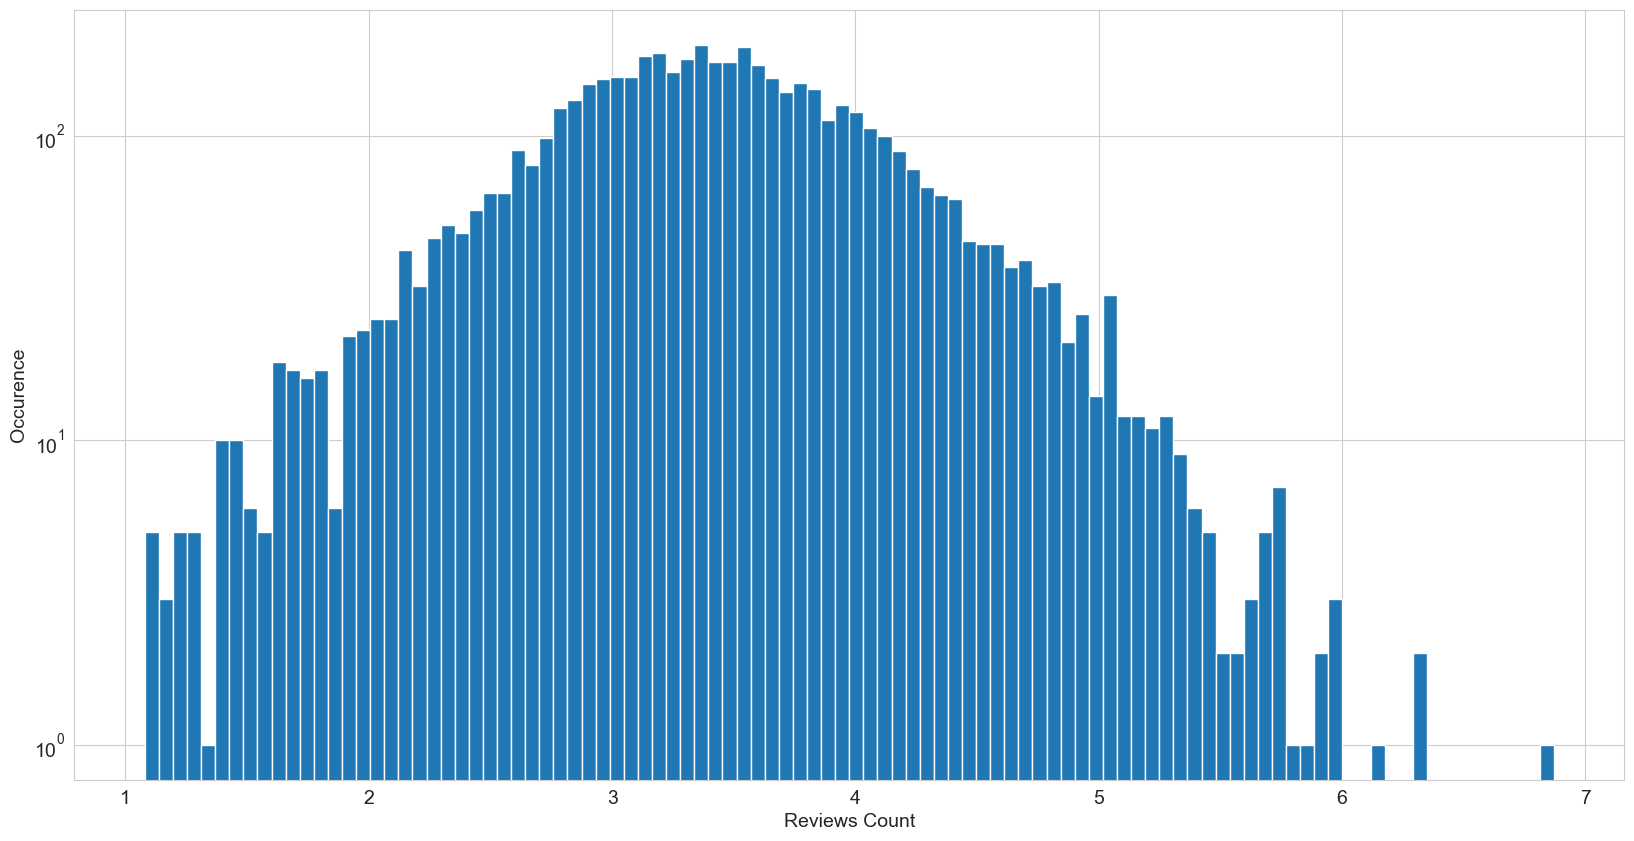

In [21]:
sns.set_style("whitegrid")
fig, ax = get_fig_and_ax()
df["Log Reviews Count"].hist(ax=ax, bins=100)
ax.set_yscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("Reviews Count", fontsize=14)
ax.set_ylabel("Occurence", fontsize=14)

In [22]:
# Выгрузка датасета

df.to_csv("vgsales_lab1.csv")